# Pre-processing ADNI Merge Data

In [4]:
import pandas as pd
import numpy as np
import re
import os
import sys
import json
from scipy.io import loadmat
import matplotlib.pyplot as plt 
import seaborn as sns

In [5]:
FC_DATA_PATH = "../FMRI_ADNI_DATA/fc/"
ADNI_MERGE_PATH = 'data/ADNIMERGE_29Apr2024.csv'
OUTPUT_DIR = 'fc_trials/visualise_parcellated'

In [6]:
data_type = {
    19: str,
    20: str,
    21: str,
    50: str,
    51: str,
    104: str,
    105: str,
    106: str
}

df = pd.read_csv(ADNI_MERGE_PATH, dtype=data_type)
df.head()

,RID,COLPROT,ORIGPROT,PTID,SITE,VISCODE,EXAMDATE,DX_bl,AGE,PTGENDER,...,PTAU_bl,FDG_bl,PIB_bl,AV45_bl,FBB_bl,Years_bl,Month_bl,Month,M,update_stamp
0,2,ADNI1,ADNI1,011_S_0002,11,bl,2005-09-08,CN,74.3,Male,...,NaN,1.33615,NaN,NaN,NaN,0.000000,0.00000,0,0,2023-07-07 04:59:40.0
1,3,ADNI1,ADNI1,011_S_0003,11,bl,2005-09-12,AD,81.3,Male,...,22.83,1.10860,NaN,NaN,NaN,0.000000,0.00000,0,0,2023-07-07 04:59:40.0
2,3,ADNI1,ADNI1,011_S_0003,11,m06,2006-03-13,AD,81.3,Male,...,22.83,1.10860,NaN,NaN,NaN,0.498289,5.96721,6,6,2023-07-07 04:59:40.0
3,3,ADNI1,ADNI1,011_S_0003,11,m12,2006-09-12,AD,81.3,Male,...,22.83,1.10860,NaN,NaN,NaN,0.999316,11.96720,12,12,2023-07-07 04:59:40.0
4,3,ADNI1,ADNI1,011_S_0003,11,m24,2007-09-12,AD,81.3,Male,...,22.83,1.10860,NaN,NaN,NaN,1.998630,23.93440,24,24,2023-07-07 04:59:40.0


In [7]:
def get_rid_viscode(filename):
    pattern = r'sub-ADNI\d+S(\d{4})_ses-(M\d{3})'
    match = re.search(pattern, filename)

    if match:
        rid = match.group(1)
        viscode = match.group(2)
        return rid, viscode        
    else:
        print("Pattern not found in the filename.")
        return None

In [8]:
def replace_viscode(str):
    if str == 'BL' or str == 'SC':
        return df['VISCODE'].replace(str, 'M000')
    else:
        vis = str[1:]
        vis = vis.zfill(3)
        vis = 'M' + vis
        return df['VISCODE'].replace(str, vis)

df['VISCODE'] = df['VISCODE'].str.upper()

# Pad the visit codes
for val in df['VISCODE'].unique():
#     print(val)
    df['VISCODE'] = replace_viscode(val)

# Pad the RID values
df['RID'] = df['RID'].apply(lambda x: str(x).zfill(4))

# adas.head()
df.head()

,RID,COLPROT,ORIGPROT,PTID,SITE,VISCODE,EXAMDATE,DX_bl,AGE,PTGENDER,...,PTAU_bl,FDG_bl,PIB_bl,AV45_bl,FBB_bl,Years_bl,Month_bl,Month,M,update_stamp
0,0002,ADNI1,ADNI1,011_S_0002,11,M000,2005-09-08,CN,74.3,Male,...,NaN,1.33615,NaN,NaN,NaN,0.000000,0.00000,0,0,2023-07-07 04:59:40.0
1,0003,ADNI1,ADNI1,011_S_0003,11,M000,2005-09-12,AD,81.3,Male,...,22.83,1.10860,NaN,NaN,NaN,0.000000,0.00000,0,0,2023-07-07 04:59:40.0
2,0003,ADNI1,ADNI1,011_S_0003,11,M006,2006-03-13,AD,81.3,Male,...,22.83,1.10860,NaN,NaN,NaN,0.498289,5.96721,6,6,2023-07-07 04:59:40.0
3,0003,ADNI1,ADNI1,011_S_0003,11,M012,2006-09-12,AD,81.3,Male,...,22.83,1.10860,NaN,NaN,NaN,0.999316,11.96720,12,12,2023-07-07 04:59:40.0
4,0003,ADNI1,ADNI1,011_S_0003,11,M024,2007-09-12,AD,81.3,Male,...,22.83,1.10860,NaN,NaN,NaN,1.998630,23.93440,24,24,2023-07-07 04:59:40.0


In [9]:
df['RID'].unique()

array(['0002', '0003', '0004', ..., '7117', '7121', '7125'], dtype=object)

## Find trends
Plot trends between variables in ADNI Merge

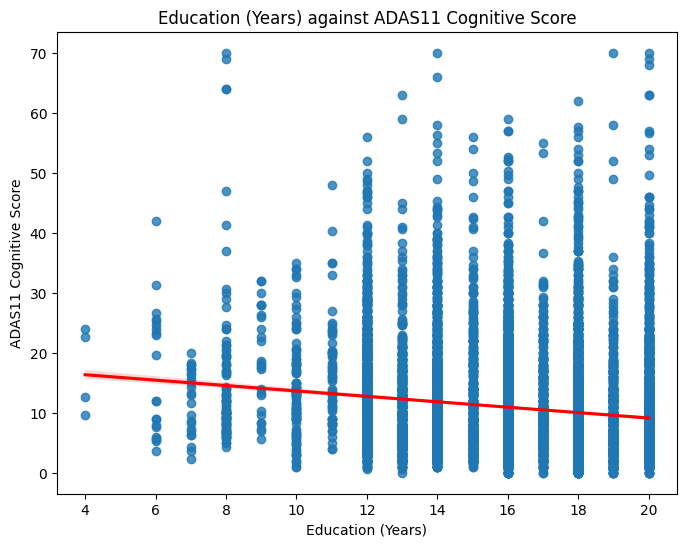

In [7]:
plt.figure(figsize=(8, 6))
sns.regplot(x='PTEDUCAT', y='ADAS11', data=df, line_kws={'color':'red'})
plt.xlabel('Education (Years)')  
plt.ylabel('ADAS11 Cognitive Score') 
plt.title('Education (Years) against ADAS11 Cognitive Score')   
# plt.savefig('../data/adas11_score_against_education.png')

plt.show()

In [11]:
from scipy.stats import pearsonr
df = df.dropna(subset=['PTEDUCAT', 'ADAS11'])
# Assuming df is your DataFrame
column1 = df['PTEDUCAT']
column2 = df['ADAS11']

# Compute Pearson correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(column1, column2)

# Set your desired threshold
threshold = 0.05

# Check if the p-value is below the threshold
if p_value < threshold:
    print("Correlation is statistically significant (p < {})".format(threshold))
else:
    print("Correlation is not statistically significant (p >= {})".format(threshold))

print("Pearson correlation coefficient:", correlation_coefficient)

Correlation is statistically significant (p < 0.05)
Pearson correlation coefficient: -0.14885351380289452


## Filter For Known Subjects

Add FMRI Filepaths to the table, and filter to remove the subjects we don't have data for

In [10]:
df['FC_DATA'] = None

fc_dir = os.listdir(FC_DATA_PATH)

fc_files = [os.path.join(FC_DATA_PATH, file) for file in fc_dir if file.endswith('.mat')]
len(fc_files)

1478

In [11]:
for fc in fc_files:
    rid, viscode = get_rid_viscode(fc)
    df.loc[(df['RID'] == rid) & (df['VISCODE'] == viscode), 'FC_DATA'] = fc

In [12]:
df.head()

,RID,COLPROT,ORIGPROT,PTID,SITE,VISCODE,EXAMDATE,DX_bl,AGE,PTGENDER,...,FDG_bl,PIB_bl,AV45_bl,FBB_bl,Years_bl,Month_bl,Month,M,update_stamp,FC_DATA
0,0002,ADNI1,ADNI1,011_S_0002,11,M000,2005-09-08,CN,74.3,Male,...,1.33615,NaN,NaN,NaN,0.000000,0.00000,0,0,2023-07-07 04:59:40.0,None
1,0003,ADNI1,ADNI1,011_S_0003,11,M000,2005-09-12,AD,81.3,Male,...,1.10860,NaN,NaN,NaN,0.000000,0.00000,0,0,2023-07-07 04:59:40.0,None
2,0003,ADNI1,ADNI1,011_S_0003,11,M006,2006-03-13,AD,81.3,Male,...,1.10860,NaN,NaN,NaN,0.498289,5.96721,6,6,2023-07-07 04:59:40.0,None
3,0003,ADNI1,ADNI1,011_S_0003,11,M012,2006-09-12,AD,81.3,Male,...,1.10860,NaN,NaN,NaN,0.999316,11.96720,12,12,2023-07-07 04:59:40.0,None
4,0003,ADNI1,ADNI1,011_S_0003,11,M024,2007-09-12,AD,81.3,Male,...,1.10860,NaN,NaN,NaN,1.998630,23.93440,24,24,2023-07-07 04:59:40.0,None


In [13]:
df_filtered = df.dropna(subset=['FC_DATA'])

df_filtered = df_filtered.drop(df_filtered[df_filtered['VISCODE'] == 'M162'].index)
df_filtered = df_filtered.drop(df_filtered[df_filtered['VISCODE'] == 'M174'].index)
df_filtered = df_filtered.drop(df_filtered[df_filtered['VISCODE'] == 'M180'].index)
df_filtered = df_filtered.drop(df_filtered[df_filtered['VISCODE'] == 'M186'].index)
df_filtered = df_filtered.drop(df_filtered[df_filtered['VISCODE'] == 'M192'].index)
c = df_filtered.drop(df_filtered[df_filtered['VISCODE'] == 'M018'].index)
df_filtered.shape

(1469, 117)

In [15]:
# df_filtered.to_csv('data/ADNIMERGE_29Apr2024_wFiles.csv')

## Calculate Ventricle_ICV

In [14]:
df_filtered['Ventricles_ICV'] = df_filtered['Ventricles'] / df_filtered['ICV_bl']
    
df_filtered.head()

,RID,COLPROT,ORIGPROT,PTID,SITE,VISCODE,EXAMDATE,DX_bl,AGE,PTGENDER,...,PIB_bl,AV45_bl,FBB_bl,Years_bl,Month_bl,Month,M,update_stamp,FC_DATA,Ventricles_ICV
49,5280,ADNI2,ADNI2,100_S_5280,100,M024,2015-09-29,SMC,67.5,Male,...,NaN,0.9851,NaN,2.03149,24.3279,24,24,2023-07-07 05:00:02.0,../FMRI_ADNI_DATA/fc/sub-ADNI100S5280_ses-M024...,0.022327
659,5265,ADNI2,ADNI2,007_S_5265,7,M024,2015-08-25,SMC,75.1,Female,...,NaN,1.2359,NaN,2.03422,24.3607,24,24,2023-07-07 05:00:01.0,../FMRI_ADNI_DATA/fc/sub-ADNI007S5265_ses-M024...,0.044713
702,5262,ADNI2,ADNI2,018_S_5262,18,M000,2013-09-03,SMC,73.5,Female,...,NaN,NaN,NaN,0.00000,0.0000,0,0,2023-07-07 05:00:01.0,../FMRI_ADNI_DATA/fc/sub-ADNI018S5262_ses-M000...,0.020445
1203,5250,ADNI2,ADNI2,018_S_5250,18,M000,2013-09-05,SMC,73.9,Male,...,NaN,1.0664,NaN,0.00000,0.0000,0,0,2023-07-07 05:00:01.0,../FMRI_ADNI_DATA/fc/sub-ADNI018S5250_ses-M000...,0.011622
1446,5242,ADNI2,ADNI2,019_S_5242,19,M000,2013-07-11,SMC,67.2,Male,...,NaN,0.9090,NaN,0.00000,0.0000,0,0,2023-07-07 05:00:01.0,../FMRI_ADNI_DATA/fc/sub-ADNI019S5242_ses-M000...,0.009847


In [15]:
df_filtered = df_filtered.dropna(subset=['Ventricles_ICV'])

In [16]:
df_filtered.to_csv('data/ADNIMERGE_29Apr2024_Ventricles_ICV.csv')

## Filter for Healthy Patients

In [16]:
healthy_patients = df_filtered[df_filtered['DX'] == 'CN']
healthy_patients.shape

healthy_patients.to_csv('data/CN_ADNIMERGE_29Apr2024_wFiles.csv')

In [54]:
def normalise_correlate_fc(fmri):
    fc_emp = fmri / np.max(fmri)
    fc_emp = np.corrcoef(fc_emp)
    return fc_emp

In [67]:
lengths = []

for file in healthy_patients['FC_DATA']:
    data = loadmat(file)['ROI_activity'][:100, :]  # get the first 100 regions
    lengths.append(data.shape[1])

lengths = np.array(lengths)
values, counts = np.unique(lengths, return_counts=True)

print(values)
print(counts)

[ 45 100 108 140 147 160 197 200 215 216]
[  1   1   1 130   1   1 369 166   1   1]


In [71]:
def get_avg_fc(files):
    corr_matrices = []

    for file in files:
        data = loadmat(file)['ROI_activity'][:100, :]  # get the first 100 regions
        if data.shape[1] == 197:
            fc = normalise_correlate_fc(data)
            corr_matrices.append(fc)

    stacked_corr = np.stack(corr_matrices, axis = 0)
    avg_corr = np.mean(stacked_corr, axis =0)
    
    return avg_corr

In [72]:
fc_files = healthy_patients['FC_DATA']
avg_fc = get_avg_fc(fc_files)

avg_fc.shape

(100, 100)

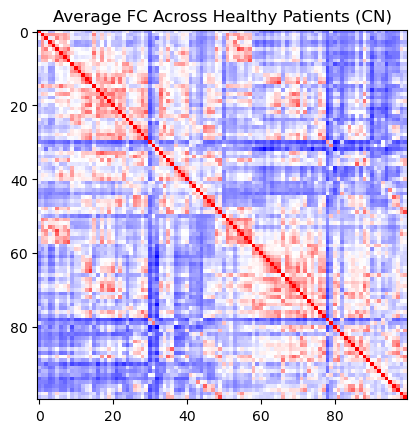

In [77]:
plt.imshow(avg_fc, cmap='bwr')
plt.title('Average FC Across Healthy Patients (CN)')
plt.axis('on')

plt.savefig(f'{OUTPUT_DIR}/avg_fc_CN.png')

In [ ]:
for fc in healthy_patients['FC_DATA']:
    rid, viscode = get_rid_viscode(fc)
    print(f'{rid}_{viscode}')